# ETL

In [25]:
import pandas as pd
import numpy as np

ruta = r"C:\Users\Roger Saavedra\Desktop\Maestria Cienca de Datos\Proyecto Ruben\VENTAS AL 22-01-2025.xlsx"
df = pd.read_excel(ruta, skiprows = 10)
df.head(10)

,FECHA,FACTURA,RIF,CLIENTE,VENDEDOR,ARTICULO,PROVEEDOR,CANTIDAD,UNIDAD DE VENTA,PRECIO UNITARIO,TOTAL VENTA,COSTO UNITARIO,COSTO TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-06 00:00:00,8406.0,V124972457,JOSE GREGORIO FLORES PIMENTEL Y/O INVERSIONES ...,ANDREINA GUANIPA,ARROZ D/ALICIA TIPO I 1X24 900GR (E),AGROPECUARIA LOS SILITOS CA,100.00,BUL,22.60,2260.00,20.95,2095.00
2,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,SAL LA PERLA 1X25 1KG (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,6.00,6.00,4.80,4.80
3,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,SAL LA PERLA 1X50 500G (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,8.13,8.13,6.50,6.50
4,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,CARAOTA NEGRA PANTERA 1X24 400GR (E),COMERCIALIZADORA EL VERDUGO CA,0.25,BUL,31.70,7.92,25.68,6.42
5,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,CRONCH FLAKES 12X300GRS,"ALFONZO RIVAS & CIA, C.A.",0.50,BUL,28.18,14.09,22.22,11.11
6,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,AZUCARADAS 12X240,"ALFONZO RIVAS & CIA, C.A.",0.50,BUL,29.00,14.50,22.87,11.44
7,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,SAL LA PERLA SACO 1X20 KG (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,3.75,3.75,3.00,3.00
8,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,CRONCH FLAKES 12X300GRS,"ALFONZO RIVAS & CIA, C.A.",2.00,BUL,28.18,56.35,22.22,44.44
9,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,NAT MIX BAN Y NUE 12X270GR,"ALFONZO RIVAS & CIA, C.A.",1.00,BUL,40.45,40.45,34.79,34.79


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            3237 non-null   object 
 1   FACTURA          3236 non-null   float64
 2   RIF              3236 non-null   object 
 3   CLIENTE          3236 non-null   object 
 4   VENDEDOR         3236 non-null   object 
 5   ARTICULO         3236 non-null   object 
 6   PROVEEDOR        3236 non-null   object 
 7   CANTIDAD         3237 non-null   float64
 8   UNIDAD DE VENTA  3236 non-null   object 
 9   PRECIO UNITARIO  3236 non-null   float64
 10  TOTAL VENTA      3236 non-null   float64
 11  COSTO UNITARIO   3236 non-null   float64
 12  COSTO TOTAL      3236 non-null   float64
dtypes: float64(6), object(7)
memory usage: 329.1+ KB


In [27]:
df.isnull().sum()

FECHA              2
FACTURA            3
RIF                3
CLIENTE            3
VENDEDOR           3
ARTICULO           3
PROVEEDOR          3
CANTIDAD           2
UNIDAD DE VENTA    3
PRECIO UNITARIO    3
TOTAL VENTA        3
COSTO UNITARIO     3
COSTO TOTAL        3
dtype: int64

In [28]:
# Los valores nulas son por el formato de excel por eso drop
df = df.dropna()

# EDA

In [29]:
df_ventas = df.copy()

In [30]:
# Rentabilidades
df_ventas['RENTABILIDAD TOTAL'] = df_ventas['TOTAL VENTA'] - df_ventas['COSTO TOTAL']
df_ventas['MARGEN RENTABILIDAD'] = df_ventas['RENTABILIDAD TOTAL'] / df_ventas['TOTAL VENTA'] * 100
df_ventas.head(10)

,FECHA,FACTURA,RIF,CLIENTE,VENDEDOR,ARTICULO,PROVEEDOR,CANTIDAD,UNIDAD DE VENTA,PRECIO UNITARIO,TOTAL VENTA,COSTO UNITARIO,COSTO TOTAL,RENTABILIDAD TOTAL,MARGEN RENTABILIDAD
1,2025-01-06 00:00:00,8406.0,V124972457,JOSE GREGORIO FLORES PIMENTEL Y/O INVERSIONES ...,ANDREINA GUANIPA,ARROZ D/ALICIA TIPO I 1X24 900GR (E),AGROPECUARIA LOS SILITOS CA,100.00,BUL,22.60,2260.00,20.95,2095.00,165.00,7.300885
2,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,SAL LA PERLA 1X25 1KG (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,6.00,6.00,4.80,4.80,1.20,20.000000
3,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,SAL LA PERLA 1X50 500G (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,8.13,8.13,6.50,6.50,1.63,20.049200
4,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,CARAOTA NEGRA PANTERA 1X24 400GR (E),COMERCIALIZADORA EL VERDUGO CA,0.25,BUL,31.70,7.92,25.68,6.42,1.50,18.939394
5,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,CRONCH FLAKES 12X300GRS,"ALFONZO RIVAS & CIA, C.A.",0.50,BUL,28.18,14.09,22.22,11.11,2.98,21.149752
6,2025-01-06 00:00:00,8407.0,J504955396,"MAYORISTA SANELLA, C.A",TULIO COLINA,AZUCARADAS 12X240,"ALFONZO RIVAS & CIA, C.A.",0.50,BUL,29.00,14.50,22.87,11.44,3.06,21.103448
7,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,SAL LA PERLA SACO 1X20 KG (E),"DISTRIBUIDORA Y EMPACADORA CONSAL,C.A",1.00,BUL,3.75,3.75,3.00,3.00,0.75,20.000000
8,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,CRONCH FLAKES 12X300GRS,"ALFONZO RIVAS & CIA, C.A.",2.00,BUL,28.18,56.35,22.22,44.44,11.91,21.135759
9,2025-01-06 00:00:00,8408.0,J403144907,DISTRIBUIDORA VG DE PARAGUANA CA,TULIO COLINA,NAT MIX BAN Y NUE 12X270GR,"ALFONZO RIVAS & CIA, C.A.",1.00,BUL,40.45,40.45,34.79,34.79,5.66,13.992583
10,2025-01-06 00:00:00,8409.0,J310774196,MI PANADERIA C.A (MI PANADERIA C.A),VICTOR GARCIA,ACEITE VEGETAL COMEST SAN SIMON 12X1LT(E),INVERSIONES LACTEAS SAN SIMON CA,10.00,BUL,37.13,371.30,31.08,310.80,60.50,16.294102


In [31]:
# KPI'S

# Venta Total
venta_total = df_ventas['TOTAL VENTA'].sum()
print(f'Las ventas son: ${venta_total:,.2f}')

# Rentabilidad Total
rentabilidad_total = df_ventas['RENTABILIDAD TOTAL'].sum()
print(f'La rentabilidad es: ${rentabilidad_total:,.2f}')

# Numero Clientes Alcanzados
num_clientes = df_ventas['CLIENTE'].nunique()
print(f"Número de clientes diferentes: {num_clientes}")

# Numero Articulos Vendidos
num_articulos = df_ventas['ARTICULO'].nunique()
print(f"Número de productos diferentes vendidos: {num_articulos}")

# Numero Proveedores
num_proveedores = df_ventas['PROVEEDOR'].nunique()
print(f"Número de proveedores diferentes utilizados: {num_proveedores}")

# Promedio Margen de Ganancia por Producto
ganancia_prom = df_ventas['MARGEN RENTABILIDAD'].mean()
print(f"El promedio de ganancia por producto es %: {ganancia_prom:,.2f}")

Las ventas son: $127,469.55
La rentabilidad es: $21,644.24
Número de clientes diferentes: 609
Número de productos diferentes vendidos: 138
Número de proveedores diferentes utilizados: 9
El promedio de ganancia por producto es %: 18.58


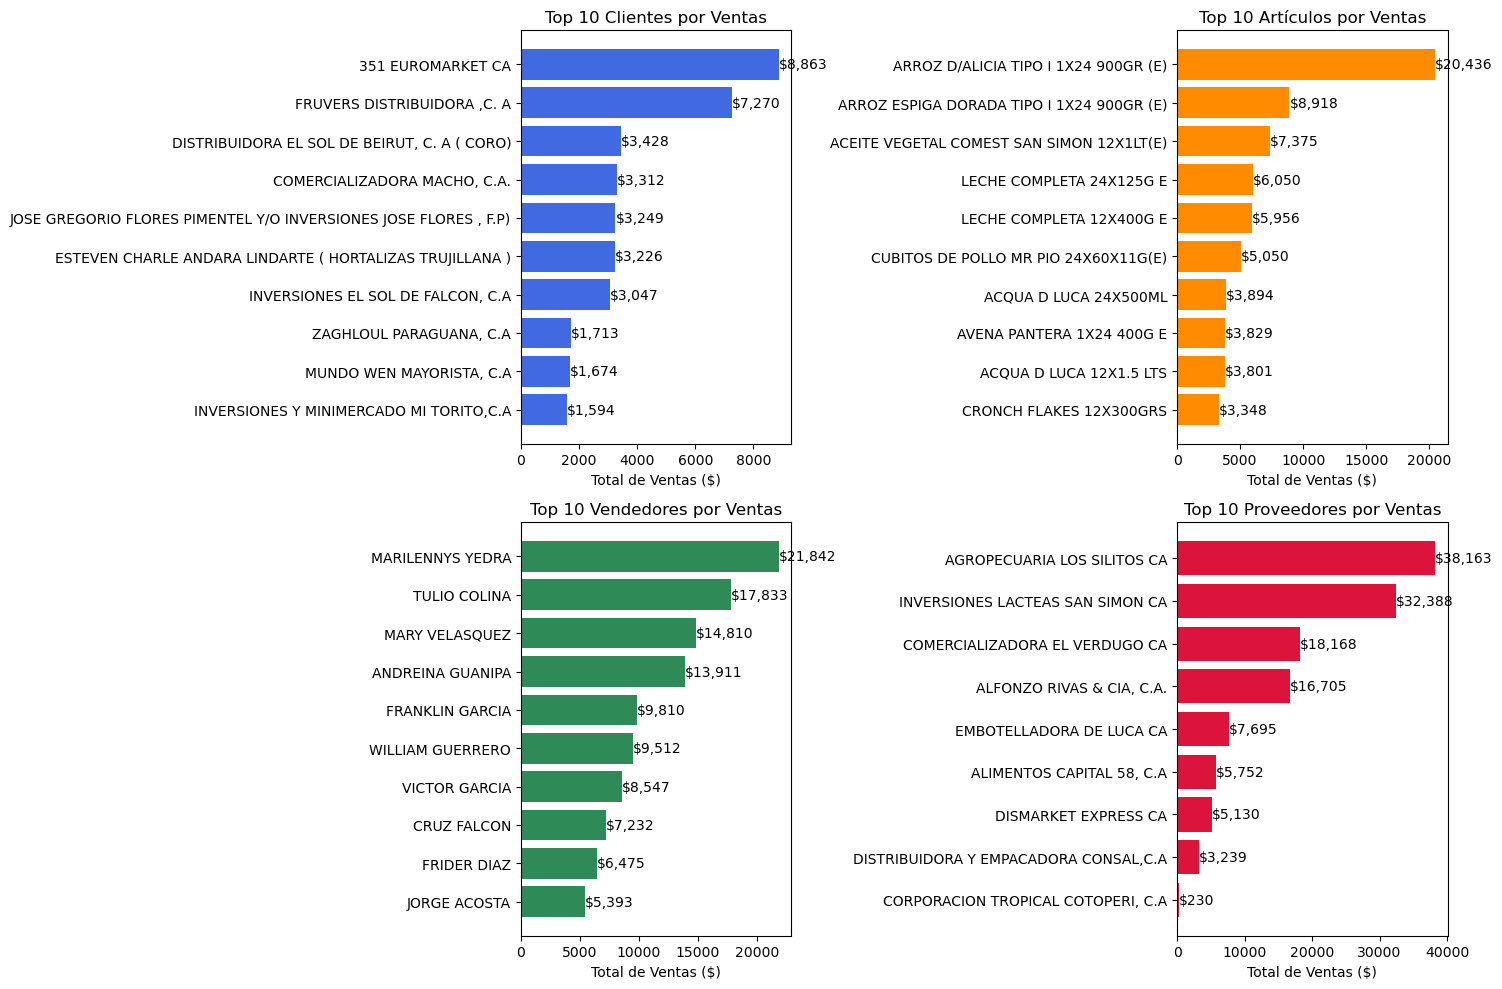

In [32]:
import matplotlib.pyplot as plt

# Top's 10
top_clientes = df_ventas.groupby('CLIENTE')['TOTAL VENTA'].sum().nlargest(10)
top_articulos = df_ventas.groupby('ARTICULO')['TOTAL VENTA'].sum().nlargest(10)
top_vendedores = df_ventas.groupby('VENDEDOR')['TOTAL VENTA'].sum().nlargest(10)
top_proveedores = df_ventas.groupby('PROVEEDOR')['TOTAL VENTA'].sum().sort_values(ascending=False)

# figura con 4 subgráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# etiquetas a las barras
def add_labels(bars, ax):
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                f"${bar.get_width():,.0f}", ha='left', va='center', fontsize=10, color="black")

# Gráfico 1: Clientes
bars = axes[0, 0].barh(top_clientes.index[::-1], top_clientes[::-1], color='royalblue')
axes[0, 0].set_title("Top 10 Clientes por Ventas", fontsize=12)
axes[0, 0].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[0, 0])

# Gráfico 2: Artículos
bars = axes[0, 1].barh(top_articulos.index[::-1], top_articulos[::-1], color='darkorange')
axes[0, 1].set_title("Top 10 Artículos por Ventas", fontsize=12)
axes[0, 1].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[0, 1])

# Gráfico 3: Vendedores
bars = axes[1, 0].barh(top_vendedores.index[::-1], top_vendedores[::-1], color='seagreen')
axes[1, 0].set_title("Top 10 Vendedores por Ventas", fontsize=12)
axes[1, 0].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[1, 0])

# Gráfico 4: Proveedores
bars = axes[1, 1].barh(top_proveedores.index[::-1], top_proveedores[::-1], color='crimson')
axes[1, 1].set_title("Top 10 Proveedores por Ventas", fontsize=12)
axes[1, 1].set_xlabel("Total de Ventas ($)")
add_labels(bars, axes[1, 1])


plt.tight_layout()
plt.show()


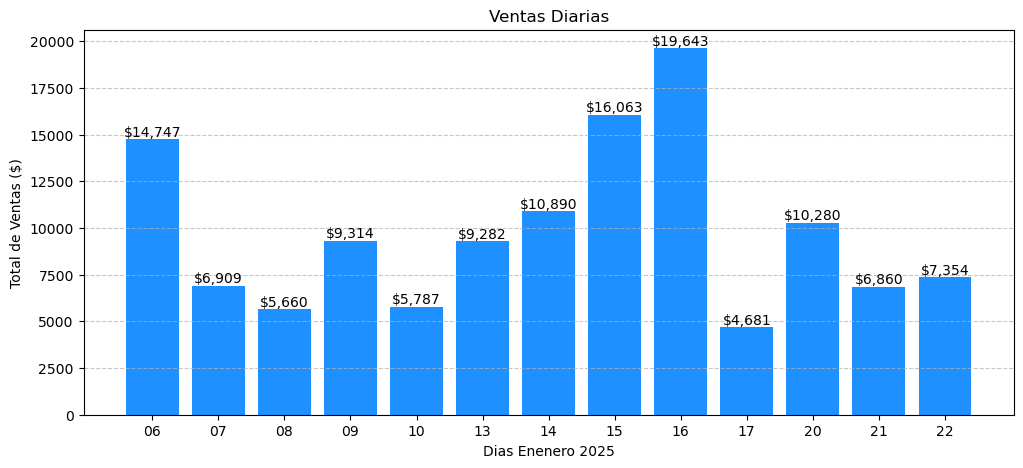

In [33]:
# Distribuciones
plt.figure(figsize=(12,5))

# Ventas por dia
ventas_diarias = df_ventas.groupby('FECHA')['TOTAL VENTA'].sum()

# Convertir índice a solo día
dias = ventas_diarias.index.strftime('%d')  

bars = plt.bar(dias, ventas_diarias, color='dodgerblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval:,.0f}", ha="center", va="bottom", fontsize=10, color="black")

# Configurar grafico
plt.title("Ventas Diarias")
plt.xlabel("Dias Enenero 2025")
plt.ylabel("Total de Ventas ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

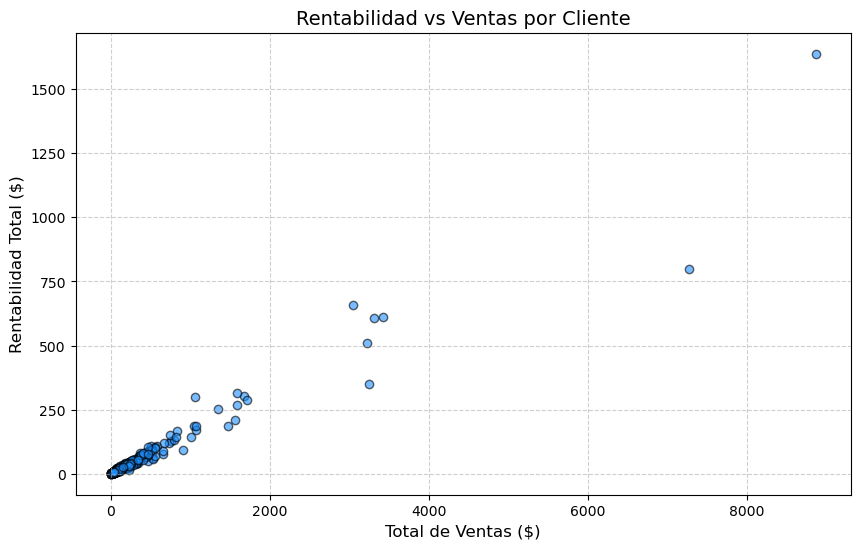

In [34]:
import matplotlib.pyplot as plt

# Agrupar clientes por ventas y rentabilidad total
df_clientes = df_ventas.groupby('CLIENTE').agg({
    'TOTAL VENTA': 'sum',  
    'RENTABILIDAD TOTAL': 'sum'  
}).reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(df_clientes['TOTAL VENTA'], df_clientes['RENTABILIDAD TOTAL'], alpha=0.6, color='dodgerblue', edgecolors='black')

# Configuración del gráfico
plt.title("Rentabilidad vs Ventas por Cliente", fontsize=14)
plt.xlabel("Total de Ventas ($)", fontsize=12)
plt.ylabel("Rentabilidad Total ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [35]:
# Clasificacion ABC de Clientes
ventas_clientes = df_ventas.groupby('CLIENTE')['TOTAL VENTA'].sum().sort_values(ascending=False).reset_index()

ventas_clientes['VENTAS ACUMULADAS %'] = ventas_clientes['TOTAL VENTA'].cumsum() / ventas_clientes['TOTAL VENTA'].sum() * 100

ventas_clientes['CATEGORIA'] = 'C'
ventas_clientes.loc[ventas_clientes['VENTAS ACUMULADAS %'] <= 70, 'CATEGORIA'] = 'A'
ventas_clientes.loc[(ventas_clientes['VENTAS ACUMULADAS %'] > 70) & (ventas_clientes['VENTAS ACUMULADAS %'] <= 90), 'CATEGORIA'] = 'B'

# Crear resumen del Análisis ABC
abc_summary = ventas_clientes.groupby('CATEGORIA').agg(
    Count_Clientes=('CLIENTE', 'count'),
    Total_Ventas_Cliente=('TOTAL VENTA', 'sum')
).reset_index()

# Calcular porcentaje de contribución
abc_summary['%CT'] = (abc_summary['Total_Ventas_Cliente'] / abc_summary['Total_Ventas_Cliente'].sum()) * 100

# Agregar fila de Totales
abc_summary = pd.concat([abc_summary, pd.DataFrame({
    'CATEGORIA': ['Total'],
    'Count_Clientes': [abc_summary['Count_Clientes'].sum()],
    'Total_Ventas_Cliente': [abc_summary['Total_Ventas_Cliente'].sum()],
    '%CT': [abc_summary['%CT'].sum()]
})], ignore_index=True)

# Formatear los valores numéricos
abc_summary['Total_Ventas_Cliente'] = abc_summary['Total_Ventas_Cliente'].apply(lambda x: f"{x:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
abc_summary['%CT'] = abc_summary['%CT'].apply(lambda x: f"{x:,.2f}%")

print(abc_summary)


  CATEGORIA  Count_Clientes Total_Ventas_Cliente      %CT
0         A             124            89.015,87   69.83%
1         B             189            25.642,50   20.12%
2         C             296            12.811,18   10.05%
3     Total             609           127.469,55  100.00%


# KMEANS

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3236 entries, 1 to 3236
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA                3236 non-null   object 
 1   FACTURA              3236 non-null   float64
 2   RIF                  3236 non-null   object 
 3   CLIENTE              3236 non-null   object 
 4   VENDEDOR             3236 non-null   object 
 5   ARTICULO             3236 non-null   object 
 6   PROVEEDOR            3236 non-null   object 
 7   CANTIDAD             3236 non-null   float64
 8   UNIDAD DE VENTA      3236 non-null   object 
 9   PRECIO UNITARIO      3236 non-null   float64
 10  TOTAL VENTA          3236 non-null   float64
 11  COSTO UNITARIO       3236 non-null   float64
 12  COSTO TOTAL          3236 non-null   float64
 13  RENTABILIDAD TOTAL   3236 non-null   float64
 14  MARGEN RENTABILIDAD  3236 non-null   float64
dtypes: float64(8), object(7)
memory usage: 404.

In [37]:
# Agrupar por cliente 
df_clientes = df_ventas.groupby('CLIENTE').agg(
    total_compras=('TOTAL VENTA', 'sum'),
    productos_distintos=('ARTICULO', 'nunique'),
    facturas=('FACTURA', 'nunique'),
    cantidad_comprada=('CANTIDAD', 'sum'),
    rentabilidad_total=('RENTABILIDAD TOTAL', 'sum')  # Para calcular rentabilidad
).reset_index()

# Calcular nuevas características
df_clientes["ticket_promedio"] = df_clientes["total_compras"] / df_clientes["facturas"]
df_clientes["productos_por_factura"] = df_clientes["productos_distintos"] / df_clientes["facturas"]
df_clientes["cantidad_por_factura"] = df_clientes["cantidad_comprada"] / df_clientes["facturas"]
df_clientes["ratio_diversificacion"] = df_clientes["productos_distintos"] / df_clientes["total_compras"]

# Aplicar transformación logarítmica a variables con alta dispersión
df_clientes["log_total_compras"] = np.log1p(df_clientes["total_compras"])
df_clientes["log_cantidad_comprada"] = np.log1p(df_clientes["cantidad_comprada"])
df_clientes["log_ticket_promedio"] = np.log1p(df_clientes["ticket_promedio"])

# Seleccionar características para clustering (usar versiones log en lugar de originales)
features = [
    "log_total_compras", "productos_distintos", "facturas", "log_cantidad_comprada",
    "log_ticket_promedio", "productos_por_factura", "cantidad_por_factura",
    "ratio_diversificacion", "rentabilidad_total"
]

X = df_clientes[features]

# Escalar los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
# Verfico la correlacion de las features

# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Ordenar la matriz de correlación de mayor a menor en términos absolutos
correlation_sorted = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Eliminar las correlaciones de la diagonal (correlación de una variable consigo misma)
correlation_sorted = correlation_sorted[correlation_sorted < 1]

# Convertir a DataFrame para visualizar
df_correlation = pd.DataFrame(correlation_sorted, columns=['Correlation'])
df_correlation.head(20)


,,Correlation
log_total_compras,log_ticket_promedio,0.904913
log_ticket_promedio,log_total_compras,0.904913
log_total_compras,log_cantidad_comprada,0.881899
log_cantidad_comprada,log_total_compras,0.881899
cantidad_por_factura,rentabilidad_total,0.870433
rentabilidad_total,cantidad_por_factura,0.870433
log_cantidad_comprada,log_ticket_promedio,0.776147
log_ticket_promedio,log_cantidad_comprada,0.776147
productos_distintos,productos_por_factura,0.722996
productos_por_factura,productos_distintos,0.722996


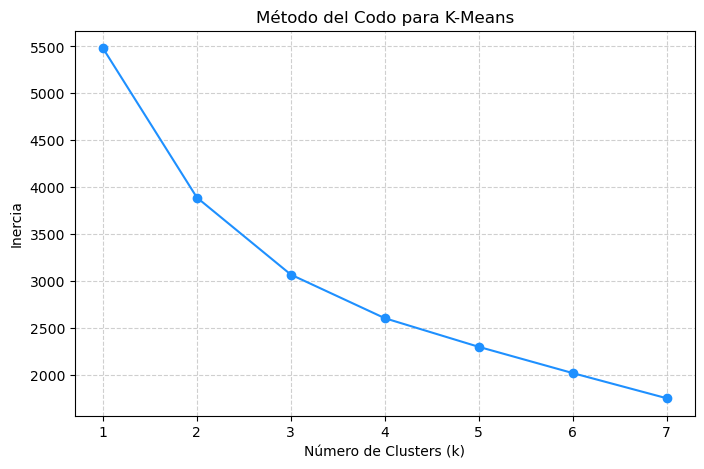

In [39]:
# Metodo del codo

from threadpoolctl import threadpool_limits

threadpool_limits(limits=1) 


inertia = []
k_range = range(1, 8)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='dodgerblue')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-Means")
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [40]:
# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(X_scaled)
df_clientes["Cluster"] = kmeans.fit_predict(X_scaled)

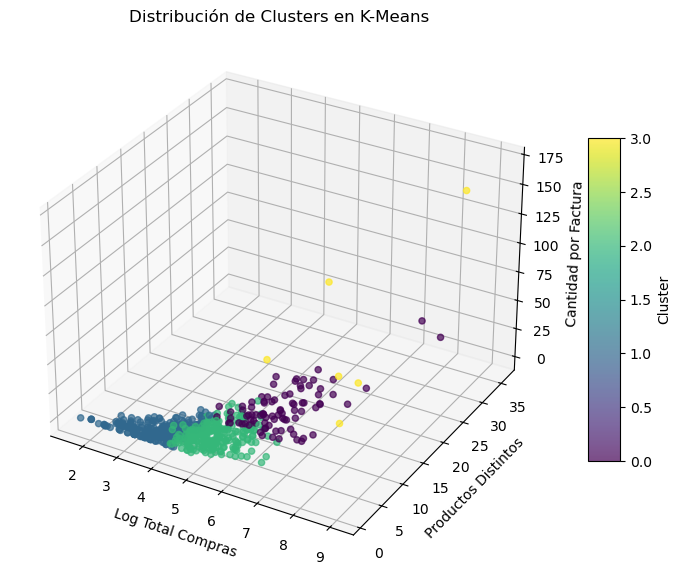

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tres característicass para la visualización en 3D
features_3d = ['log_total_compras', 'productos_distintos', 'cantidad_por_factura']

X_3d = df_clientes[features_3d].values

# Crear una figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a cada cluster
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                     c=df_clientes['Cluster'], cmap='viridis', alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Log Total Compras')
ax.set_ylabel('Productos Distintos')
ax.set_zlabel('Cantidad por Factura')
ax.set_title('Distribución de Clusters en K-Means')

# Agregar una barra de colores para indicar los clusters
legend1 = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
legend1.set_label('Cluster')


plt.show()


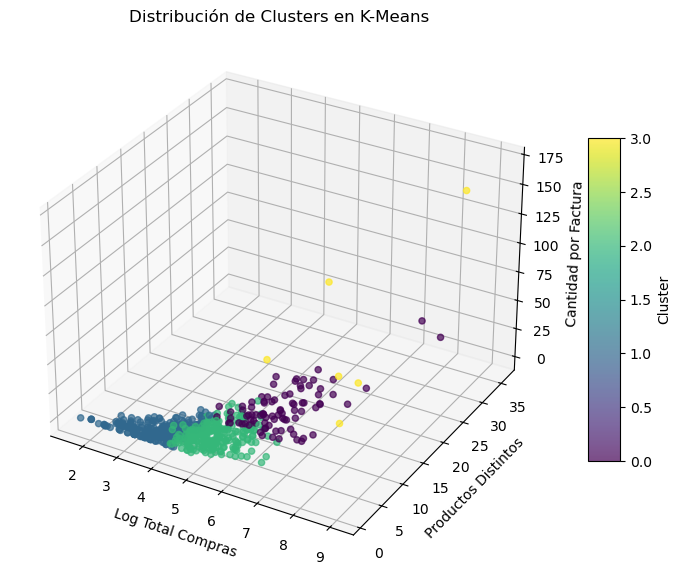

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tres características para la visualización en 3D
features_3d = ['log_total_compras', 'productos_distintos', 'cantidad_por_factura']

X_3d = df_clientes[features_3d].values

# Crear una figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a cada cluster
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], 
                     c=df_clientes['Cluster'], cmap='viridis', alpha=0.7)

# Etiquetas de los ejes
ax.set_xlabel('Log Total Compras')
ax.set_ylabel('Productos Distintos')
ax.set_zlabel('Cantidad por Factura')
ax.set_title('Distribución de Clusters en K-Means')

# Agregar una barra de colores para indicar los clusters
legend1 = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
legend1.set_label('Cluster')

# Guardar la imagen en formato PNG
plt.savefig("clusters_3d.png", dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()




In [43]:
# Calcular estadísticas por cluster
cluster_summary = df_clientes.groupby("Cluster").agg(
    Cantidad_Clientes=("Cluster", "count"),
    Ventas_Totales=("total_compras", "sum"),
    Factura_Promedio=("ticket_promedio", "mean"),
    Rentabilidad_Total=("rentabilidad_total","sum"),
    Frecuencia_Compra=("facturas", "mean"),
    Cantidad_Factura=("cantidad_por_factura", "mean"),
    Variedad_Productos_mean=("productos_distintos", "median"),  
).reset_index()

# Mostrar el análisis de clusters
display(cluster_summary)


,Cluster,Cantidad_Clientes,Ventas_Totales,Factura_Promedio,Rentabilidad_Total,Frecuencia_Compra,Cantidad_Factura,Variedad_Productos_mean
0,0,87,47968.95,263.164577,8143.58,2.275862,10.989176,11.0
1,1,278,11549.63,32.991583,2076.47,1.384892,1.930156,3.0
2,2,238,40968.38,95.817144,6807.40,2.121849,4.421901,4.0
3,3,6,26982.59,1901.971111,4616.79,2.500000,102.527778,7.0


In [44]:
# Guardar la tabla en un archivo Excel
cluster_summary.to_excel("segmentacion_clientes.xlsx", index=False, engine="openpyxl")


In [45]:
# Insights
df_ventas['Cluster'] = df_clientes["Cluster"]

productos_por_cluster = df_ventas.groupby("Cluster")["ARTICULO"].nunique().reset_index()
productos_por_cluster.columns = ["Cluster", "Total_Productos_Distintos"]
display(productos_por_cluster)


,Cluster,Total_Productos_Distintos
0,0.0,46
1,1.0,73
2,2.0,69
3,3.0,4


In [46]:
productos_top = df_ventas.groupby(["Cluster", "ARTICULO"])["CANTIDAD"].sum().reset_index()
productos_top = productos_top.sort_values(["Cluster", "CANTIDAD"], ascending=[True, False])

# Mostrar los 5 productos más comprados por cluster
for cluster in productos_top["Cluster"].unique():
    print(f"\n🔹 Top 5 productos más comprados en Cluster {cluster}:")
    display(productos_top[productos_top["Cluster"] == cluster].head(7))



🔹 Top 5 productos más comprados en Cluster 0.0:


,Cluster,ARTICULO,CANTIDAD
3,0.0,ARROZ D/ALICIA TIPO I 1X24 900GR (E),40.00
0,0.0,ACEITE VEGETAL COMEST SAN SIMON 12X1LT(E),22.00
2,0.0,ACQUA D LUCA 24X500ML,20.00
45,0.0,YIICITOS QUESO MIX 25GR 5X12,9.00
11,0.0,CARAOTA NEGRA PANTERA 1X24 454G (E),7.75
36,0.0,SAL LA PERLA 1X25 1KG (E),7.00
29,0.0,LENTEJAS DOÑA ALICIA 1X24 500GR (E),5.25



🔹 Top 5 productos más comprados en Cluster 1.0:


,Cluster,ARTICULO,CANTIDAD
51,1.0,ARROZ D/ALICIA TIPO I 1X24 900GR (E),148.00
48,1.0,ACQUA D LUCA 12X1.5 LTS,70.00
104,1.0,SAL LA PERLA 1X25 1KG (E),56.00
49,1.0,ACQUA D LUCA 24X500ML,42.00
95,1.0,MAIZINA AMERICANA 50X90GRS,26.00
116,1.0,VINAGRE 12X500ML KRAYS,26.00
72,1.0,CRONCH FLAKES 12X300GRS,25.25



🔹 Top 5 productos más comprados en Cluster 2.0:


,Cluster,ARTICULO,CANTIDAD
120,2.0,ACQUA D LUCA 12X1.5 LTS,53.00
183,2.0,VINAGRE 12X1000ML KRAYS,18.25
122,2.0,ARROZ D/ALICIA TIPO I 1X24 900GR (E),17.00
135,2.0,CASABE TORTA KRAYS 220G (E),17.00
158,2.0,MAIZ P/COTUFA PANTERA 1X24 500G E,15.25
184,2.0,VINAGRE 12X500ML KRAYS,14.50
119,2.0,ACEITE VEGETAL COMEST SAN SIMON 12X1LT(E),14.00



🔹 Top 5 productos más comprados en Cluster 3.0:


,Cluster,ARTICULO,CANTIDAD
188,3.0,ARROZ D/ALICIA TIPO I 1X24 900GR (E),12.0
191,3.0,LENTEJAS DOÑA ALICIA 1X24 500GR (E),2.0
189,3.0,CARAOTAS NEGRAS D/ALICIA 1X24 500GR (E),1.0
190,3.0,CRONCH FLAKES 12X300GRS,0.5


In [47]:
clientes_top = df_ventas.groupby(["Cluster", "CLIENTE"])["CANTIDAD"].sum().reset_index()
clientes_top = clientes_top.sort_values(["Cluster", "CANTIDAD"], ascending=[True, False])

# Mostrar los 5 productos más comprados por cluster
for cluster in clientes_top["Cluster"].unique():
    print(f"\n🔹 Top 5 productos más comprados en Cluster {cluster}:")
    display(clientes_top[clientes_top["Cluster"] == cluster].head(7))



🔹 Top 5 productos más comprados en Cluster 0.0:


,Cluster,CLIENTE,CANTIDAD
11,0.0,"COMERCIALIZADORA MACHO, C.A.",20.0
33,0.0,"INVERSIONES E & F 2017, C.A",16.0
15,0.0,"DISTRIBUIDORA EL SOL DE BEIRUT, C. A ( CORO)",15.0
22,0.0,"FERRETERIA Y QUINCALLERIA CASA WU, C.A.",10.0
36,0.0,"INVERSIONES MAR DELICIAS CARIBE, C.A",10.0
45,0.0,MI PANADERIA C.A (MI PANADERIA C.A),10.0
25,0.0,GERALDINE MARIA SUARCE CARRASQUERO,8.0



🔹 Top 5 productos más comprados en Cluster 1.0:


,Cluster,CLIENTE,CANTIDAD
135,1.0,JOSE GREGORIO FLORES PIMENTEL Y/O INVERSIONES ...,110.0
88,1.0,"DISTRIBUIDORA EL SOL DE BEIRUT, C. A ( CORO)",46.0
80,1.0,"COMERCIALIZADORA MACHO, C.A.",40.0
76,1.0,COMERCIAL MUNDO BUENO CA,30.0
161,1.0,SUPERMERCADO EBRAIN CA,30.0
149,1.0,"MUNDO WEN MAYORISTA, C.A",20.0
114,1.0,"IBRAHIM ATTA (ATTA 2020, F.P)",19.0



🔹 Top 5 productos más comprados en Cluster 2.0:


,Cluster,CLIENTE,CANTIDAD
201,2.0,"DISTRIBUIDORA EL SOL DE BEIRUT, C. A ( CORO)",20.0
271,2.0,SUPERMERCADO EBRAIN CA,20.0
199,2.0,"DE TODITOS MARKET, C.A",15.0
226,2.0,"IBRAHIM ATTA (ATTA 2020, F.P)",11.0
253,2.0,"MERCADEO NUEVO FUTURO 3, C.A",11.0
177,2.0,"AREPERA LICORERIA PUNTO CRIOLLO, C.A",10.0
224,2.0,"HORTALIZAS EL PARAMO, C.A ( LA PUERTA)",10.0



🔹 Top 5 productos más comprados en Cluster 3.0:


,Cluster,CLIENTE,CANTIDAD
278,3.0,ALEXIS JOSIAS ROMERO GARCIA Y/O LICORERIA Y AG...,10.0
280,3.0,"HORTALIZAS EL PARAMO, C.A ( EL PARAMO EXPRESS)",2.0
279,3.0,ARCANGEL MIGUEL LOYO ORTIZ,1.0
282,3.0,"MERCADEO NUEVO FUTURO 3, C.A",1.0
283,3.0,"SOLIM GARCIA LOPEZ, F.P",1.0
281,3.0,"MAYORISTA SANELLA, C.A",0.5
